## Importing Libraries

In [80]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib import colors 

In [81]:
rows    = 101
cols    = 101
total_cells =  rows * cols
num_mazes = 50

## Maze Generator

In [83]:
def deadEnd(x, y, visited):

    '''
    x: integer, horizontal coordinate/ num_row
    y: integer, vertical coordinate/ num_col
    visited: set of visited cells in maze

    '''

    for i in range(-1, 1):
        for j in range(-1, 1):
            # i and j are not in the same cell
            if (i!= 0 and j != 0): 
                # x and y are within the maze
                if (x + i > 0 and x + i < rows): 
                    if (y + j > 0 and y + j < cols):
                        # neighbors are unvisited
                        if (x + i, y + j not in visited):

                            # return the unvisited neigbors
                            return False, x + i, y + j 

    return True, -1, -1

In [21]:
def validRow(x):
    if (x >= 0 and x < rows): return True
    return False 

def validCol(y):
    if (y >= 0 and y < cols): return True
    return False 

In [79]:
# generate 50 mazes
def generate_mazes():
    
    # initiate all cells as unvisited
    maze = np.zeros((num_mazes, rows, cols))

    for idx in range(0, num_mazes):
        print(f"generating maze {idx}")

        # empty visited (closed list) and stack (open list)
        visited = set()
        stack = []

        # begin from random cell; must be integers
        row = random.randint(0, rows - 1)
        col = random.randint(0, cols - 1)
        print(f"start location: ({row}, {col})") 

        # mark start cell as visited
        visited.add((row, col))
        # cell is unblocked
        maze[idx, row, col] = 1

        # explore neighbors randomly using DFS
        while(len(visited) < total_cells):

            curr_row = row + random.randint(-1, 1)
            curr_col = col + random.randint(-1, 1)

            i = 0
            dead_end = False

            # check neighboring cell validity
            while((validRow(curr_row) == False) or (validCol(curr_col) == False) or ((curr_row, curr_col) in visited)): 
                curr_row = row + random.randint(-1, 1)
                curr_col = col + random.randint(-1, 1)

                i = i + 1

                if (i == 8):
                    dead_end = True
                    break
                
            if(dead_end == False): visited.add((curr_row, curr_col))

            prob = random.uniform(0, 1)

            if(prob < 0.3 and dead_end == False): 
                # cell is blocked with 30% probability
                maze[idx, curr_row, curr_col] = 0

                # start with neighbors of blocked cell in next iteration
                row = curr_row
                col = curr_col
            else:
                if(dead_end == False):
                    # cell is unblocked with 70% probability
                    maze[idx, curr_row, curr_col] = 1

                    # put in stack (open list)
                    stack.append((curr_row, curr_col))

                    dead_end, row_to_visit, col_to_visit = deadEnd(row, col, visited) 

                if(dead_end == True):
                    # no neighbors left --> find next unvisited neighbor from stack
                    while(len(stack) > 0):
                        row_stack, col_stack = stack.pop()
                        dead_end, row_to_visit, col_to_visit = deadEnd(row_stack, col_stack, visited)

                        if(dead_end == False): break

                    if(len(stack) > 0): 
                        # stack is not empty OR we've reached a cell that's not a dead end --> update row and col
                        visited.add((row_to_visit, col_to_visit))
                        row = row_to_visit
                        col = col_to_visit
                    
                    else:
                        # repeat visiting neighbors
                        row = random.randint(0, rows - 1)
                        col = random.randint(0, cols - 1)

                        if(len(visited) < total_cells):
                            while((validRow(row) == False) or (validCol(col) == False) or ((row, col) in visited)):
                                row = random.randint(0, rows - 1)
                                col = random.randint(0, cols - 1)

                            visited.add((row, col))

                        else:
                            visited.add((row_to_visit, col_to_visit))
                            row = row_to_visit
                            col = col_to_visit
    return maze

In [84]:
mazes = generate_mazes()
for idx in range(0, num_mazes):
    np.savetxt("maze_" + str(idx) + ".txt", mazes[idx].astype(int), fmt = '%i', delimiter = ',') 

generating maze 0
start location: (84, 34)
generating maze 1
start location: (31, 53)
generating maze 2
start location: (56, 29)
generating maze 3
start location: (52, 35)
generating maze 4
start location: (3, 2)
generating maze 5
start location: (64, 22)
generating maze 6
start location: (38, 50)
generating maze 7
start location: (44, 100)
generating maze 8
start location: (5, 35)
generating maze 9
start location: (36, 9)
generating maze 10
start location: (8, 73)
generating maze 11
start location: (44, 20)
generating maze 12
start location: (46, 84)
generating maze 13
start location: (32, 60)
generating maze 14
start location: (91, 82)
generating maze 15
start location: (77, 76)
generating maze 16
start location: (60, 90)
generating maze 17
start location: (58, 43)
generating maze 18
start location: (50, 66)
generating maze 19
start location: (96, 33)
generating maze 20
start location: (34, 42)
generating maze 21
start location: (19, 3)
generating maze 22
start location: (48, 92)
gen

## Visualizing the Maze

Maze Grid

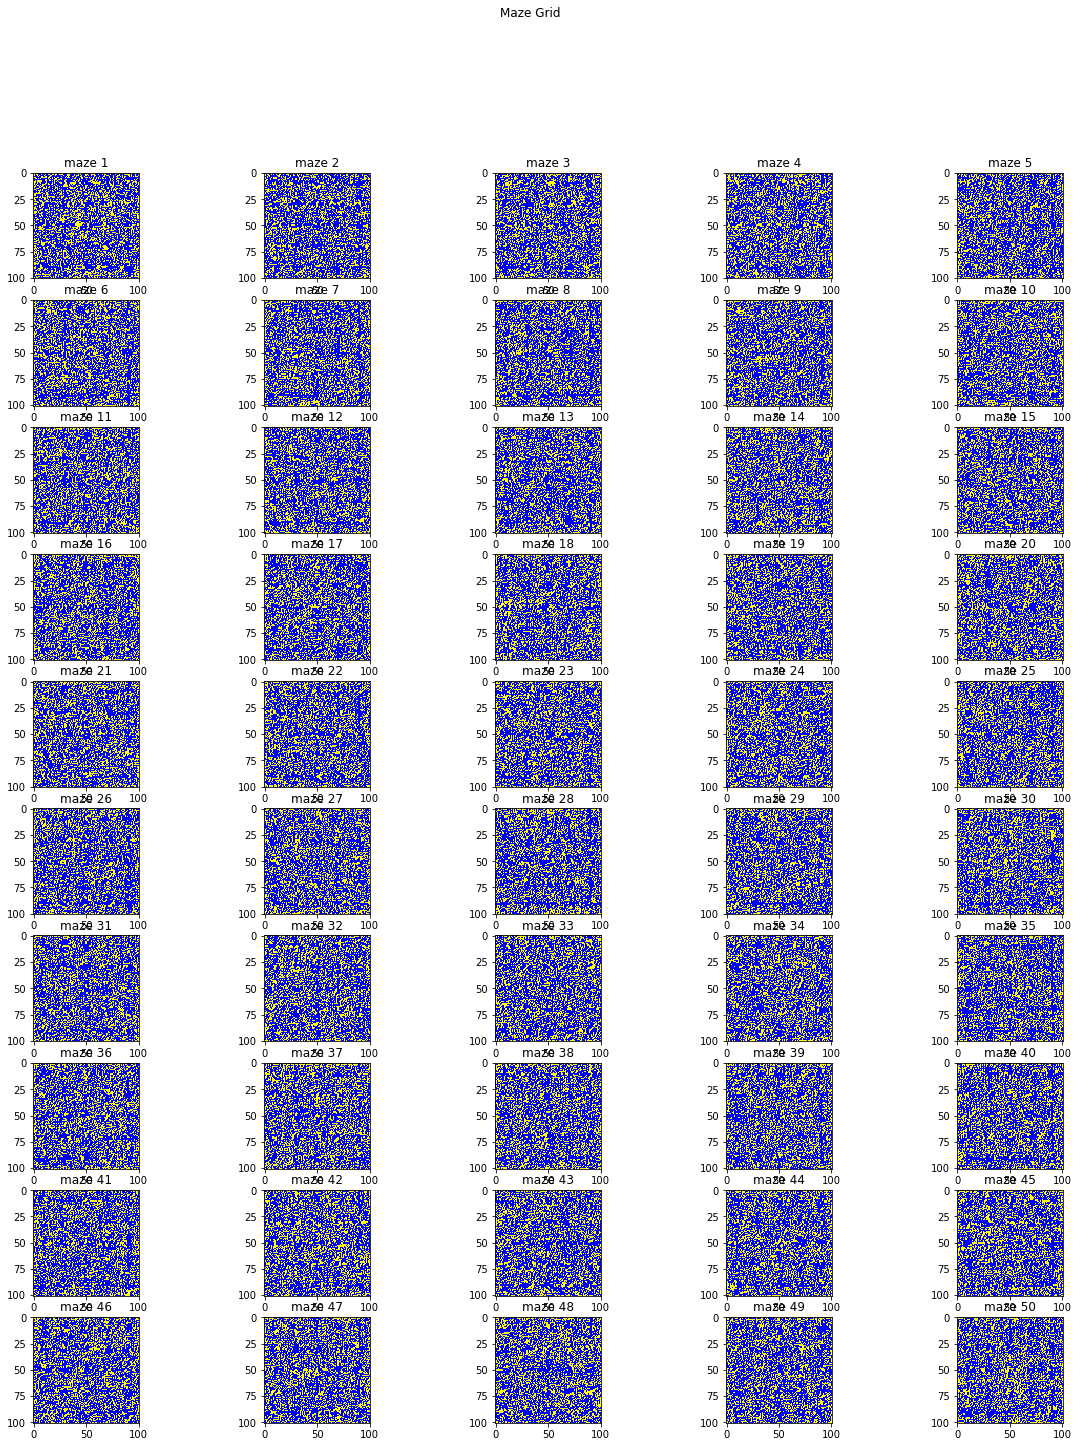

In [85]:
fig, ax = plt.subplots(10, 5, figsize=(20, 23))
fig.suptitle('Maze Grid')
colormap = colors.ListedColormap(["yellow","blue"])

k = 0
for i in range(10):
    for j in range(5):
        ax[i][j].imshow(np.array(mazes[k]), cmap=colormap) 
        ax[i][j].set_title(f"maze {k+1}")
        k += 1

plt.show(); 

Singular Maze

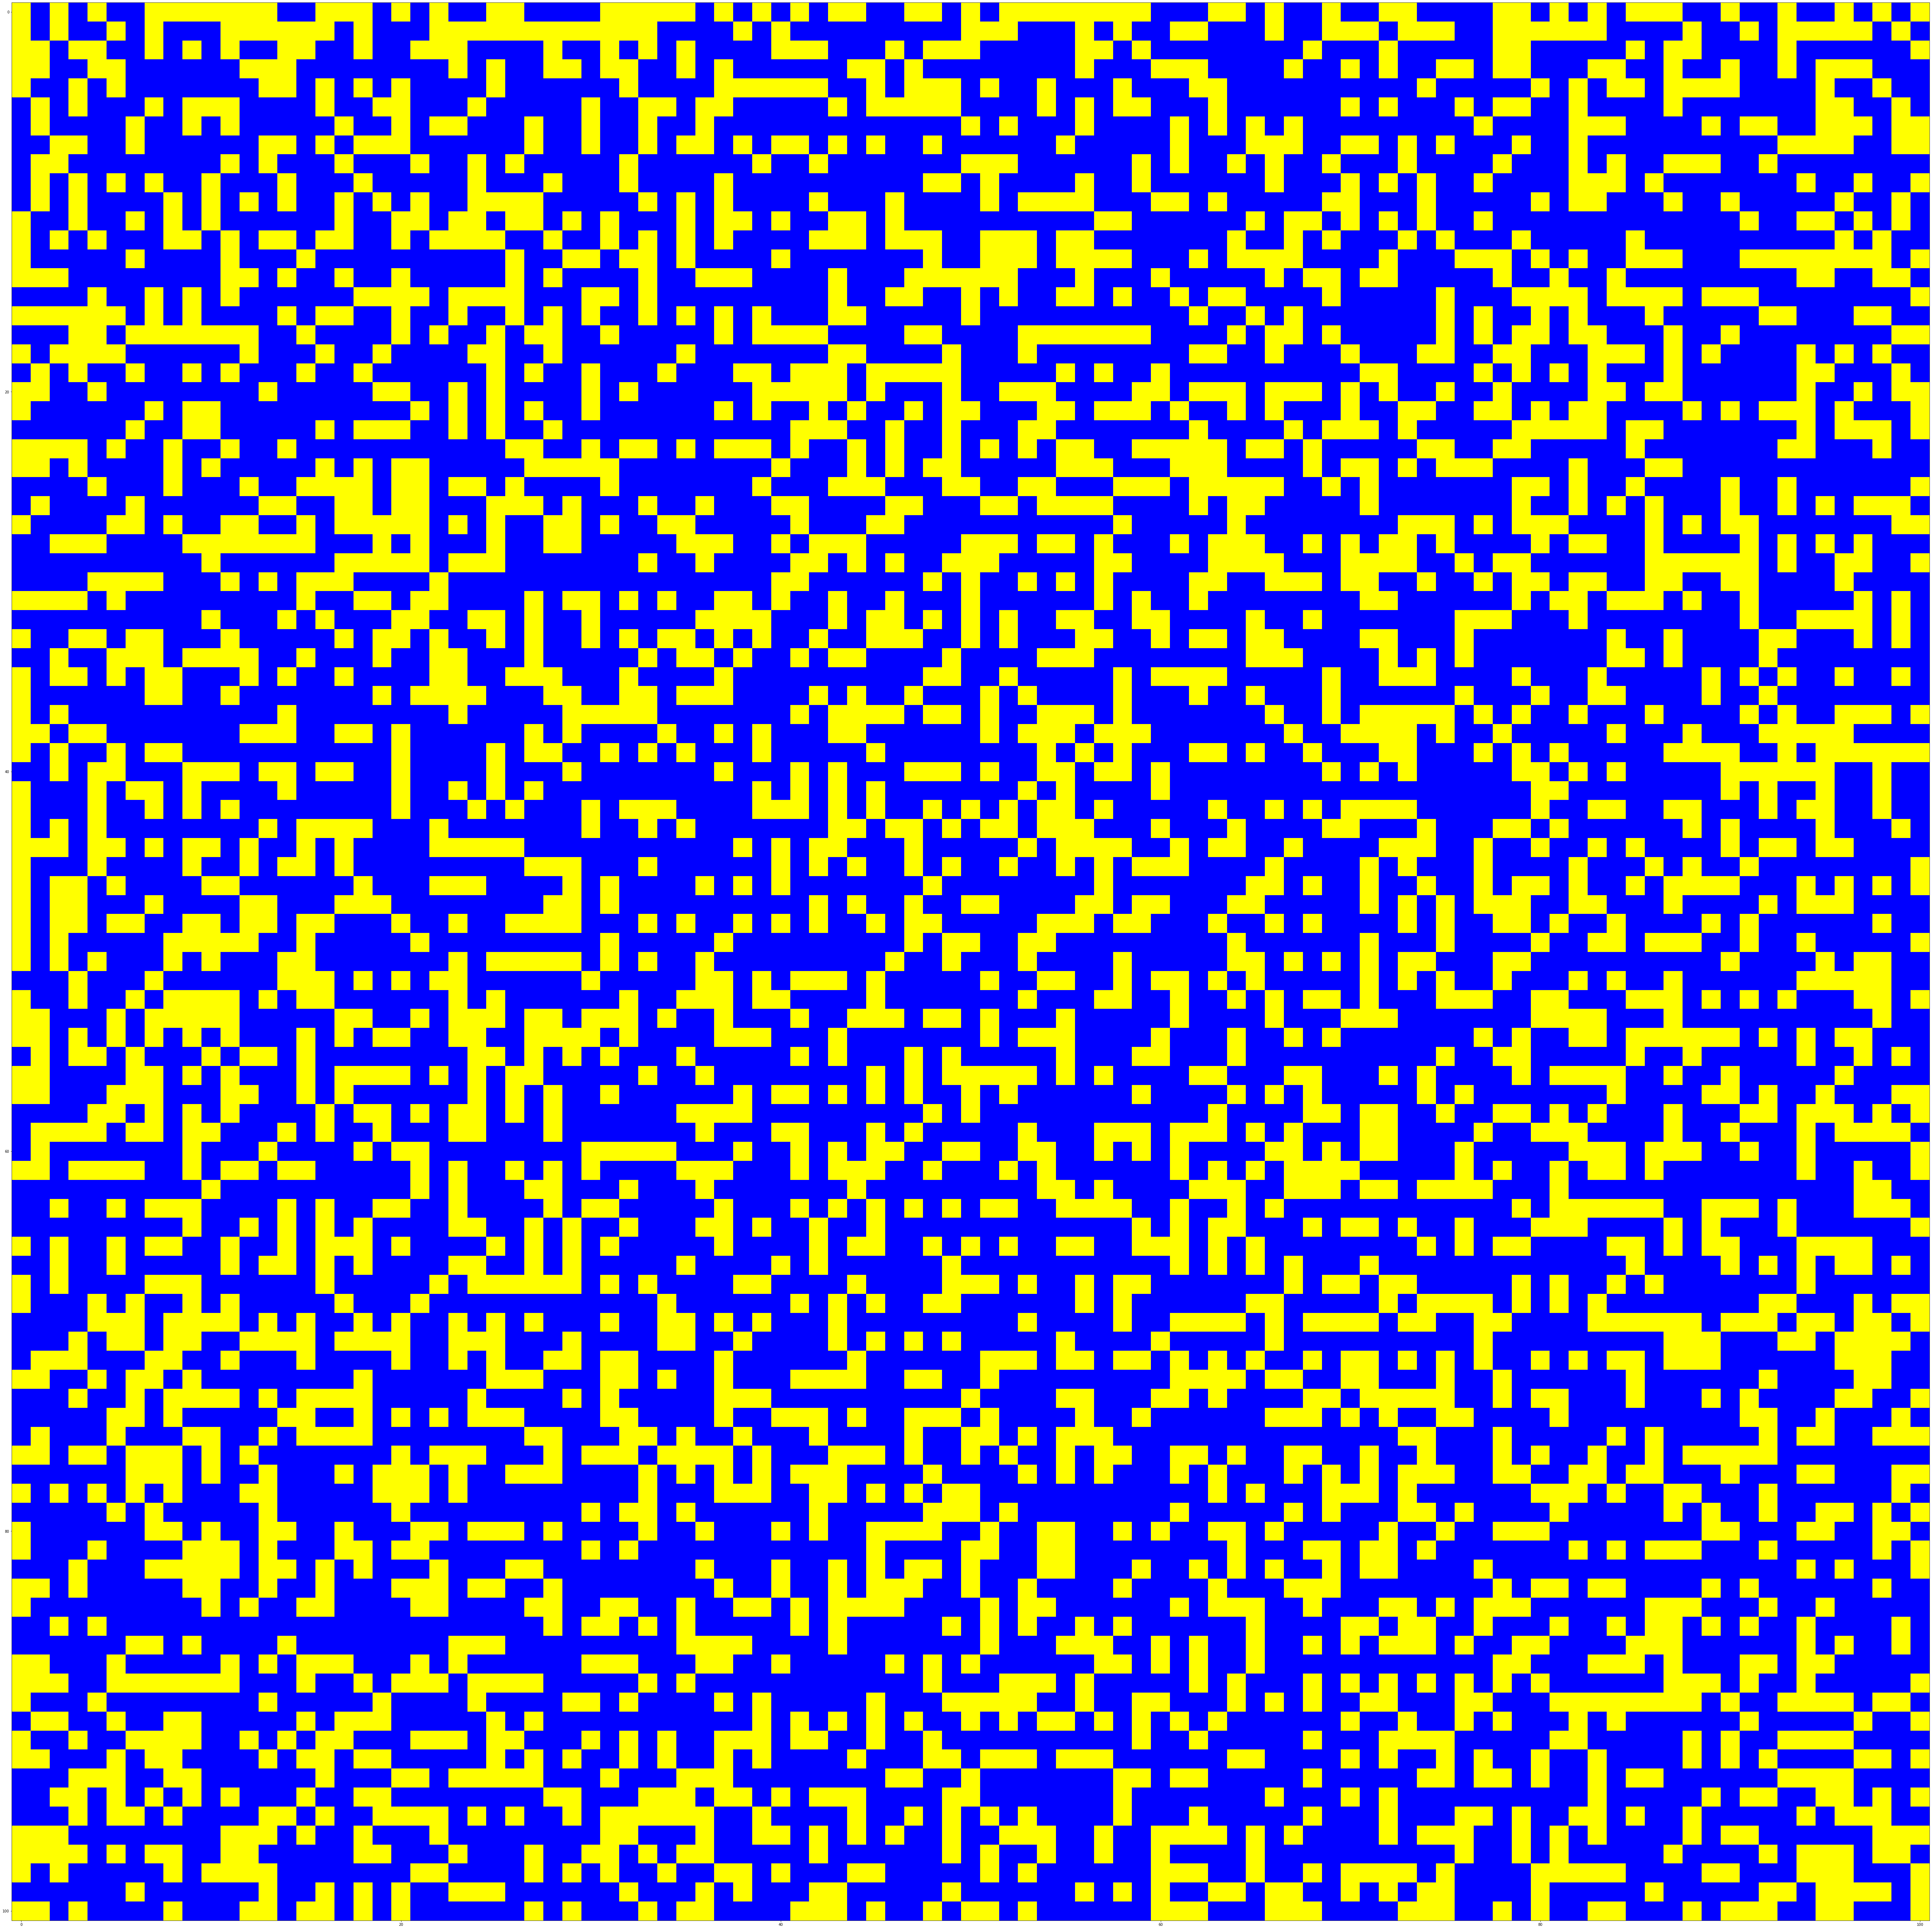

In [86]:
plt.figure(figsize=(100,100)) 
plt.imshow(mazes[1], cmap=colors.ListedColormap(["yellow","blue"]))
plt.show(); 

Maze with Path

In [92]:
path = [(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), 
        (7, 7), (8, 7), (9, 7), (10, 7), (11, 7), (11, 6), (11, 5), (12, 5), (13, 5), (14, 5), (15, 5), (15, 4), (16, 4), 
        (17, 4), (17, 5), (17, 6), (18, 6), (19, 6), (20, 6), (21, 6), (22, 6), (22, 5), (23, 5), (23, 4), (24, 4), (25, 4), 
        (26, 4), (27, 4), (28, 4), (29, 4), (29, 3), (30, 3), (31, 3), (31, 4), (31, 5), (31, 6), (31, 7), (31, 8), (31, 9), 
        (31, 10), (31, 11), (32, 11), (33, 11), (34, 11), (35, 11), (36, 11), (36, 12), (36, 13), (36, 14), (37, 14), (37, 15), 
        (37, 16), (38, 16), (38, 17), (38, 18), (37, 18), (37, 19), (37, 20), (37, 21), (37, 22), (38, 22), (38, 23), (39, 23), 
        (40, 23), (41, 23), (42, 23), (43, 23), (43, 24), (43, 25), (44, 25), (45, 25), (45, 26), (46, 26), (47, 26), (48, 26), 
        (49, 26), (49, 27), (50, 27), (50, 28), (50, 29), (51, 29), (51, 30)]

test = mazes[1]
for (i, j) in path:
    test[i][j] = 2
test

array([[2., 1., 0., ..., 0., 1., 0.],
       [2., 2., 2., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

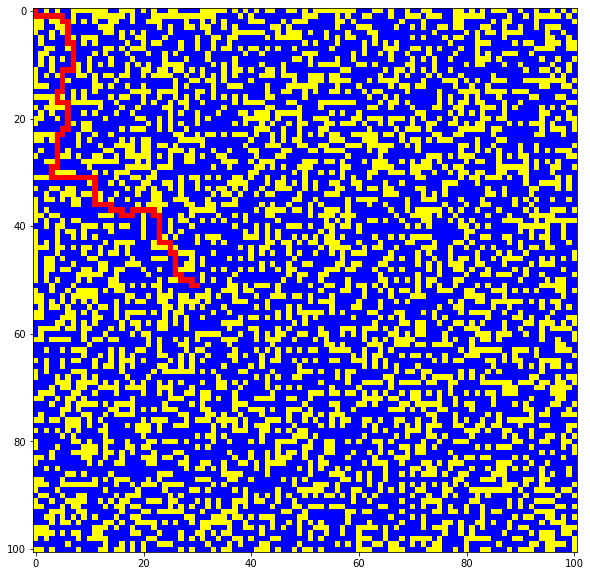

In [93]:
plt.figure(figsize=(10, 10)) 
plt.imshow(test, cmap=colors.ListedColormap(["yellow","blue","red"]))
plt.show(); 